In [4]:
import numpy as np
import pandas as pd
import os

spotify_data = pd.read_csv(r'C:\Users\ASus\Desktop\spotifyProject\spotify.csv')
spotify_data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [6]:
spotify_data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [7]:
spotify_data['danceability'].value_counts()

#count_values returns object containing counts of unique values and it is in descending order
#so the first value repeats more than others

0.683    12
0.760    11
0.704    11
0.614    10
0.633    10
         ..
0.364     1
0.325     1
0.927     1
0.932     1
0.538     1
Name: danceability, Length: 632, dtype: int64

In [8]:
spotify_data['liveness'].value_counts()

0.1010    22
0.1160    21
0.1110    20
0.1050    19
0.1220    19
          ..
0.0650     1
0.0527     1
0.0821     1
0.4390     1
0.9630     1
Name: liveness, Length: 793, dtype: int64

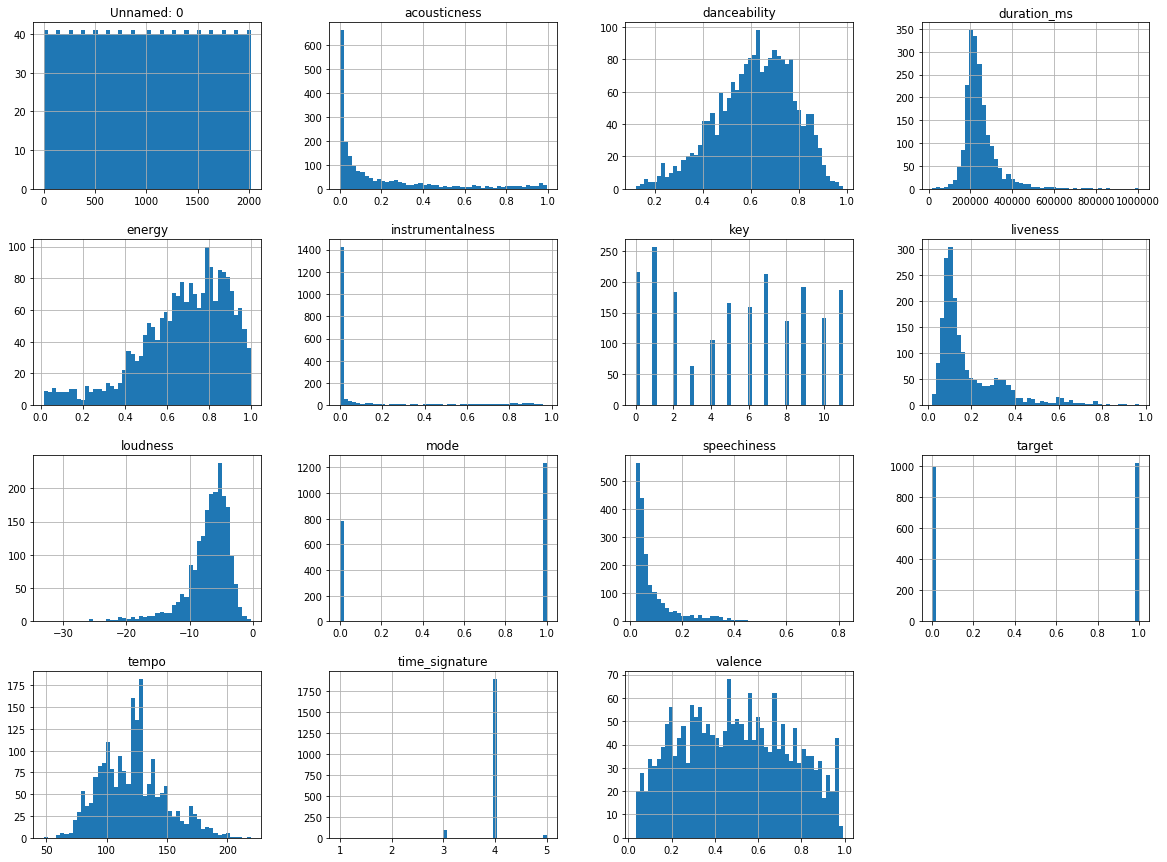

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
spotify_data.hist(bins = 50, figsize = (20, 15))
plt.savefig(r'C:\Users\ASus\Desktop\spotifyProject\features_histogram_plots.png', bbox_inches='tight')
plt.show()

In [12]:
#to make the result constant
np.random.seed(42)

In [13]:
#This part is just for practicing/ scikit learn have the package of train_test_split

def split_train_test(data, ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data) * ratio)
    test_set = shuffled_indices[:test_size]
    train_set = shuffled_indices[test_size:]
    return data.iloc[train_set], data.iloc[test_set]
  

In [14]:
train_set,test_set = split_train_test(spotify_data, 0.2)
print(len(train_set),'train +', len(test_set),'test')


1614 train + 403 test


In [15]:
#we wanna try differnt spliting 

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [17]:
#spotify_data_with_id["id"] = spotify_data["loudness"] * 1000 + spotify_data["tempo"]
#train_set, test_set = split_train_test_by_id(spotify_data_with_id, 0.2, "id")


In [18]:
test_set.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1555,1555,0.7480,0.520,341667,0.0748,0.633000,8,0.1020,-24.477,1,0.0497,107.327,4.0,0.134,0,The Man I Love,Marcus Roberts
526,526,0.0726,0.739,386907,0.5260,0.000000,4,0.2150,-7.384,0,0.1010,143.948,4.0,0.374,1,Money Trees,Kendrick Lamar
393,393,0.0021,0.646,219754,0.8920,0.006260,10,0.1170,-5.015,1,0.0331,119.998,4.0,0.935,1,Wait & See,Holy Ghost!
1788,1788,0.7890,0.664,145707,0.3200,0.000000,4,0.1520,-7.356,1,0.0322,141.916,3.0,0.710,0,Perfect Harmony,Rags Cast
433,433,0.0198,0.517,245013,0.4910,0.000001,11,0.0786,-13.742,0,0.0341,104.996,4.0,0.331,1,Midnight City,M83


In [19]:
train_set.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
261,261,0.006200,0.748,312240,0.733,0.00000,11,0.3290,-4.421,0,0.0720,93.019,4.0,0.273,1,Again,Fetty Wap
746,746,0.000294,0.827,352341,0.462,0.54300,8,0.0886,-10.673,1,0.0623,123.994,4.0,0.341,1,Pleasure Power (DJ Smash Disco Remix),Afrolicious
1381,1381,0.021900,0.630,222546,0.684,0.00108,11,0.1030,-6.740,0,0.0399,142.952,4.0,0.881,0,너와의 공식 Love Equation,플랫핏 Flat Feet
240,240,0.063900,0.742,256693,0.945,0.16500,5,0.1310,-6.445,1,0.0428,112.977,4.0,0.748,1,Uncle ACE,Blood Orange
1645,1645,0.031000,0.510,210013,0.747,0.00000,5,0.2330,-4.124,1,0.0651,125.951,4.0,0.349,0,Heroes (we could be),Alesso


In [20]:
cols = [0,14, 15, 16]
spotify_data.drop(spotify_data.columns[cols],axis=1)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623


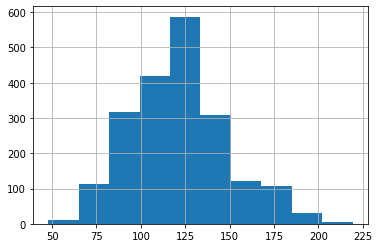

In [21]:
spotify_data["tempo"].hist()

In [22]:
spotify_data["tempo_cat"] = np.ceil(spotify_data["tempo"] / 1.5)

In [23]:
#spotify_data["tempo_cat"].where(spotify_data["tempo_cat"] < 5, 5, inplace=True)
spotify_data['tempo_cat']

0       101.0
1       107.0
2        51.0
3        58.0
4       117.0
        ...  
2012     50.0
2013     74.0
2014    101.0
2015    101.0
2016    127.0
Name: tempo_cat, Length: 2017, dtype: float64

In [24]:
spotify_data["tempo_cat"] = pd.cut(spotify_data["tempo"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [25]:
spotify_data['tempo_cat'].value_counts()

5    2017
4       0
3       0
2       0
1       0
Name: tempo_cat, dtype: int64

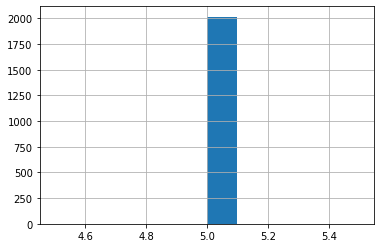

In [27]:
spotify_data['tempo_cat'].hist()

#we don't have any special information here! But I did it just to try!

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(spotify_data, spotify_data["tempo_cat"]):
    strat_train_set = spotify_data.loc[train_index]
    strat_test_set = spotify_data.loc[test_index]

In [29]:
strat_test_set["tempo_cat"].value_counts() / len(strat_test_set)

5    1.0
4    0.0
3    0.0
2    0.0
1    0.0
Name: tempo_cat, dtype: float64

In [30]:
spotify_data["tempo_cat"].value_counts() / len(spotify_data)

5    1.0
4    0.0
3    0.0
2    0.0
1    0.0
Name: tempo_cat, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

def tempo_cat_proportions(data):
    return data["tempo_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(spotify_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": tempo_cat_proportions(spotify_data),
    "Stratified": tempo_cat_proportions(strat_test_set),
    "Random": tempo_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [33]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.0,0.0,0.0,NaN,NaN
2,0.0,0.0,0.0,NaN,NaN
3,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,NaN,NaN
5,1.0,1.0,1.0,0.0,0.0


In [34]:
################## Discover and visualize the data to gain some vision about it ###############

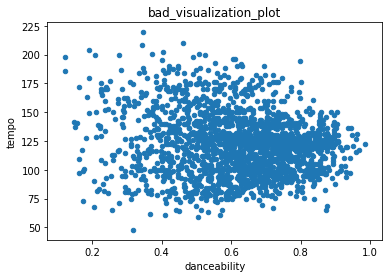

In [35]:
spotify_data.plot(kind = "scatter", x = "danceability", y = "tempo")
plt.title('bad_visualization_plot')
plt.savefig(r'C:\Users\ASus\Desktop\spotifyProject\bad_visualization_plot.png', bbox_inches='tight')
plt.show()

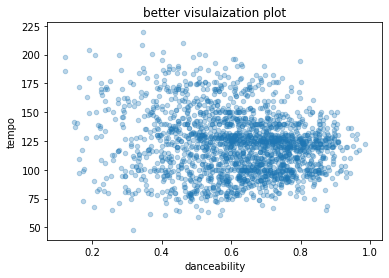

In [36]:
spotify_data.plot(kind = 'scatter', x = 'danceability', y = 'tempo', alpha = 0.3)
plt.title('better visulaization plot')
plt.savefig(r'C:\Users\ASus\Desktop\spotifyProject\better_visualization_plot.png', bbox_inches='tight')
plt.show()


No handles with labels found to put in legend.


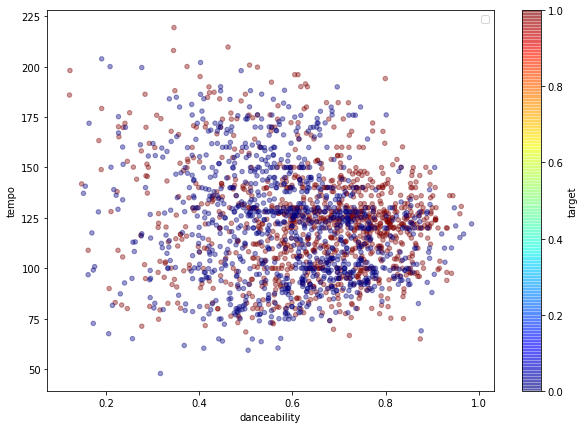

In [37]:
spotify_data.plot(kind = "scatter", x = "danceability", y = "tempo", alpha = 0.4,
                  figsize = (10,7),c = "target", cmap = plt.get_cmap("jet"),
                  colorbar=True, sharex = False)#, s = spotify_data["speechiness"]/100,
                  #label = "speechiness",)
plt.legend()
plt.savefig(r'C:\Users\ASus\Desktop\spotifyProject\general_visualize.png', bbox_inches='tight')
plt.show()

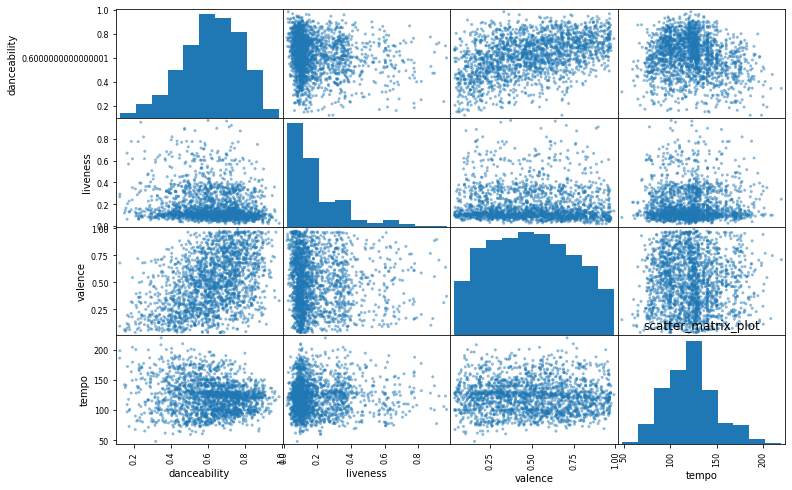

In [38]:
from pandas.plotting import scatter_matrix

attributes = ["danceability", "liveness", "valence",
              "tempo"]
scatter_matrix(spotify_data[attributes], figsize=(12, 8))
plt.title('scatter_matrix_plot')
plt.savefig(r'C:\Users\ASus\Desktop\spotifyProject\scatter_matrix_plot.png', bbox_inches='tight')
plt.show()

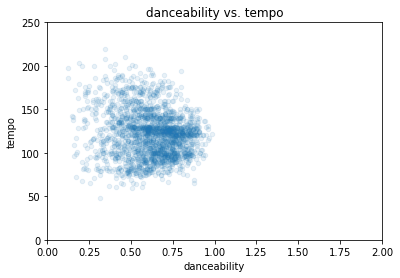

In [39]:
spotify_data.plot(kind = "scatter", x = "danceability", y = "tempo",
             alpha=0.1)
plt.axis([0, 2, 0, 250])
plt.title('danceability vs. tempo')
plt.savefig(r'C:\Users\ASus\Desktop\spotifyProject\danceability_vs_tempo.png', bbox_inches='tight')
plt.show()



In [40]:
# we wanna see the correlation between between the first defined column and other columns

corr_matrix = spotify_data.corr()
corr_matrix['acousticness'].sort_values(ascending = False)

#the correlation between the first column and first column is definitely 1

acousticness        1.000000
instrumentalness    0.144397
Unnamed: 0          0.133055
duration_ms         0.071536
mode                0.068028
key                -0.081037
speechiness        -0.099893
liveness           -0.117126
tempo              -0.127596
target             -0.129627
valence            -0.152227
danceability       -0.179894
time_signature     -0.190353
loudness           -0.562021
energy             -0.646319
Name: acousticness, dtype: float64

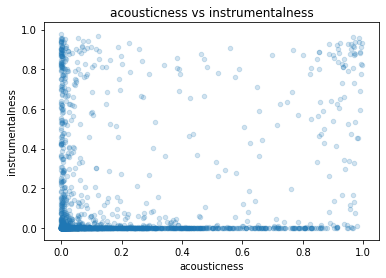

In [41]:
spotify_data.plot(kind = 'scatter', x = 'acousticness', y = 'instrumentalness', alpha = 0.2)
plt.title('acousticness vs instrumentalness')
plt.savefig(r'C:\Users\ASus\Desktop\spotifyProject\acousticness_vs_instrumentalness.png', bbox_inches = 'tight')
plt.show()

In [42]:
############################## prepare the data for machine learning algorithm ########################################

In [110]:
spotify_data = strat_train_set.drop("acousticness", axis=1) # drop labels for training set
spotify_data_labels = strat_train_set["acousticness"].copy()

In [44]:
#isnull() function detect missing values in the given series object.

sample_incomplete_rows = spotify_data[spotify_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,Unnamed: 0,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,tempo_cat


In [45]:
# we don't have any cell without data/ so it returns us just the column labels

try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy = "median")

In [46]:
# dropping the columns without numerical data like artist and song title

spotify = spotify_data.drop('artist', axis = 1)

In [47]:
spotify = spotify.drop('song_title', axis = 1)

In [48]:
spotify

,Unnamed: 0,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,tempo_cat
672,672,0.701,389493,0.914,0.000137,7,0.1690,-4.463,1,0.1290,123.966,4.0,0.3720,1,5
1380,1380,0.214,249727,0.484,0.000097,9,0.1140,-5.440,1,0.0324,81.625,4.0,0.2670,0,5
817,817,0.148,175173,0.031,0.595000,2,0.1200,-25.756,0,0.0365,141.840,3.0,0.0638,1,5
1588,1588,0.567,160133,0.436,0.000000,2,0.2470,-9.450,1,0.1580,97.206,4.0,0.5980,0,5
18,18,0.713,195429,0.611,0.000000,1,0.1170,-6.702,0,0.2410,140.061,4.0,0.7830,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1087,0.889,201280,0.853,0.000107,9,0.2050,-4.260,1,0.2410,93.022,4.0,0.9160,0,5
1305,1305,0.406,180872,0.936,0.242000,2,0.0620,-4.564,0,0.1100,139.922,4.0,0.2600,0,5
1799,1799,0.487,208360,0.759,0.000000,11,0.1650,-4.849,1,0.0405,80.958,4.0,0.2380,0,5
861,861,0.592,265827,0.688,0.268000,6,0.0508,-14.107,1,0.1150,102.099,4.0,0.9270,1,5


In [49]:
imputer.fit(spotify)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [50]:
imputer.statistics_

array([ 9.86000e+02,  6.30000e-01,  2.28923e+05,  7.20000e-01,
        1.18000e-04,  6.00000e+00,  1.29000e-01, -6.23500e+00,
        1.00000e+00,  5.65000e-02,  1.21241e+02,  4.00000e+00,
        4.86000e-01,  1.00000e+00,  5.00000e+00])

In [51]:
# measuring the median of each attribute

spotify.median().values

array([ 9.86000e+02,  6.30000e-01,  2.28923e+05,  7.20000e-01,
        1.18000e-04,  6.00000e+00,  1.29000e-01, -6.23500e+00,
        1.00000e+00,  5.65000e-02,  1.21241e+02,  4.00000e+00,
        4.86000e-01,  1.00000e+00,  5.00000e+00])

In [52]:
#training set transformation

X = imputer.transform(spotify)

In [53]:
spotify_tr = pd.DataFrame(X, columns = spotify.columns,
                          index = spotify_data.index)

In [54]:
imputer.strategy    #we defined it before! we're just checking it out

'median'

In [55]:
spotify_tr.head()

,Unnamed: 0,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,tempo_cat
672,672.0,0.701,389493.0,0.914,0.000137,7.0,0.169,-4.463,1.0,0.1290,123.966,4.0,0.3720,1.0,5.0
1380,1380.0,0.214,249727.0,0.484,0.000097,9.0,0.114,-5.440,1.0,0.0324,81.625,4.0,0.2670,0.0,5.0
817,817.0,0.148,175173.0,0.031,0.595000,2.0,0.120,-25.756,0.0,0.0365,141.840,3.0,0.0638,1.0,5.0
1588,1588.0,0.567,160133.0,0.436,0.000000,2.0,0.247,-9.450,1.0,0.1580,97.206,4.0,0.5980,0.0,5.0
18,18.0,0.713,195429.0,0.611,0.000000,1.0,0.117,-6.702,0.0,0.2410,140.061,4.0,0.7830,1.0,5.0


In [56]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [57]:
spotify_artist = spotify_data[['artist']]
spotify_artist.head()

,artist
672,Duke Dumont
1380,Sentimental Scenery
817,Nikolaus Harnoncourt
1588,Roger Day
18,Chief Keef


In [58]:
spotify_songTitle = spotify_data[['song_title']]
spotify_songTitle.head()

#by using two brackets, we will be given a beautiful organized table

,song_title
672,The Giver - Original Mix
1380,"지금 여기, 이곳에서 (Duet With 루시아) , 지금 여기, 이곳에서"
817,"Mozart: Requiem in D Minor, K. 626: VIII. Lacr..."
1588,Mosquito Burrito
18,Bouncin


In [59]:
spotify_songTitle = spotify_data['song_title']
spotify_songTitle.head()

#by using one bracket we will get some messy dataset

672                              The Giver - Original Mix
1380            지금 여기, 이곳에서 (Duet With 루시아) , 지금 여기, 이곳에서
817     Mozart: Requiem in D Minor, K. 626: VIII. Lacr...
1588                                     Mosquito Burrito
18                                                Bouncin
Name: song_title, dtype: object

In [60]:
#Encode categorical features as an integer array. The input to this transformer should be an array-like of integers or
#strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal
#integers.

ordinal_encoder = OrdinalEncoder()
spotify_artist_encoded = ordinal_encoder.fit_transform(spotify_artist)
spotify_artist_encoded[:10]

array([[308.],
       [871.],
       [720.],
       [823.],
       [194.],
       [485.],
       [936.],
       [704.],
       [669.],
       [884.]])

In [61]:
ordinal_encoder.categories_

[array(['!!!', '*NSYNC', '10cm', ..., 'tobyMac', '도시총각 Dosichonggak',
        '플랫핏 Flat Feet'], dtype=object)]

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
#A one hot encoding is a representation of categorical variables as binary vectors.
#This first requires that the categorical values be mapped to integer values. Then, each integer value is represented
#as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

artist_encoder = OneHotEncoder()
spotify_artist_1hot = artist_encoder.fit_transform(spotify_artist)
spotify_artist_1hot

<1613x1133 sparse matrix of type '<class 'numpy.float64'>'
	with 1613 stored elements in Compressed Sparse Row format>

In [64]:
#instead of having sparse matrix, we will have an array full of zero and one densely by using toarray 

spotify_artist_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
# this is another way for not having sparse array    ############ alternative ################
artist_encoder = OneHotEncoder(sparse = False)
spotify_artist_1hot = artist_encoder.fit_transform(spotify_artist)
spotify_artist_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
artist_encoder.categories_

[array(['!!!', '*NSYNC', '10cm', ..., 'tobyMac', '도시총각 Dosichonggak',
        '플랫핏 Flat Feet'], dtype=object)]

In [67]:
spotify_data.columns

Index(['Unnamed: 0', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist', 'tempo_cat'],
      dtype='object')

In [68]:
spotify.columns

Index(['Unnamed: 0', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'tempo_cat'],
      dtype='object')

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = "median")),
        ('std_scaler', StandardScaler()),])

spotify_tr = num_pipeline.fit_transform(spotify)

In [70]:
spotify_tr

array([[-0.55409625,  0.51396378,  1.73530487, ..., -0.48911123,
         0.965265  ,  0.        ],
       [ 0.66264355, -2.50924551,  0.04395474, ..., -0.91296393,
        -1.03598493,  0.        ],
       [-0.30490519, -2.91896175, -0.85824549, ..., -1.73321982,
         0.965265  ,  0.        ],
       ...,
       [ 1.38271978, -0.81451011, -0.45663969, ..., -1.03002801,
        -1.03598493,  0.        ],
       [-0.22928859, -0.16268881,  0.23878565, ...,  1.75125305,
         0.965265  ,  0.        ],
       [ 0.064585  , -0.5289503 , -0.4521259 , ..., -0.04911176,
        -1.03598493,  0.        ]])

In [71]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer

In [72]:
num_attribs = list(spotify)
cat_attribs = ["artist"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

spotify_prepared = full_pipeline.fit_transform(spotify_data)

In [73]:
spotify_prepared.toarray()

array([[-0.55409625,  0.51396378,  1.73530487, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66264355, -2.50924551,  0.04395474, ...,  0.        ,
         0.        ,  0.        ],
       [-0.30490519, -2.91896175, -0.85824549, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.38271978, -0.81451011, -0.45663969, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22928859, -0.16268881,  0.23878565, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.064585  , -0.5289503 , -0.4521259 , ...,  0.        ,
         0.        ,  0.        ]])

In [74]:
spotify_prepared.shape  #I actually didn't get what happens here !

(1613, 1148)

In [75]:
spotify.shape

(1613, 15)

In [76]:
#For reference, here is the old solution based on a DataFrameSelector transformer 
#(to just select a subset of the Pandas DataFrame columns), and a FeatureUnion:

from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [77]:
#Now let's join all these components into a big pipeline that will preprocess both the numerical and the 
#categorical features (again, we could use CombinedAttributesAdder() instead of FunctionTransformer

num_attribs = list(spotify)
cat_attribs = ["artist"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('artist_encoder', OneHotEncoder(sparse=False)),
    ])

In [78]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [79]:
old_spotify_prepared = old_full_pipeline.fit_transform(spotify_data)
old_spotify_prepared

array([[-0.55409625,  0.51396378,  1.73530487, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66264355, -2.50924551,  0.04395474, ...,  0.        ,
         0.        ,  0.        ],
       [-0.30490519, -2.91896175, -0.85824549, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.38271978, -0.81451011, -0.45663969, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22928859, -0.16268881,  0.23878565, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.064585  , -0.5289503 , -0.4521259 , ...,  0.        ,
         0.        ,  0.        ]])

In [80]:
######## The result of ColumnTransformer is the same as FeatureUnion 

In [81]:
spotify_prepared.equals(old_spotify_prepared)  # I don't get why it doesn't work !!!!!!

AttributeError: equals not found

In [82]:
###################### Select and train a model ###############################

In [86]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(spotify, spotify_data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
# let's try the full preprocessing pipeline on a few training instances

#spotify_data_labels = ['Unnamed', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
#                       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'target', 'tempo_cat']
some_data = spotify_data.iloc[:5]
some_labels = spotify_data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lr.predict(spotify))

Predictions: [-0.08513341  0.41163209  0.91964229 ...  0.14408242  0.30395244
  0.02840472]


In [148]:
print("Labels:", list(some_labels))

Labels: [0.000134, 0.8370000000000001, 0.99, 0.519, 0.314]


In [150]:
some_data_prepared = some_data_prepared.toarray()

In [151]:
some_data_prepared

array([[-0.55409625,  0.51396378,  1.73530487, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66264355, -2.50924551,  0.04395474, ...,  0.        ,
         0.        ,  0.        ],
       [-0.30490519, -2.91896175, -0.85824549, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.02010383, -0.31788436, -1.04024903, ...,  0.        ,
         0.        ,  0.        ],
       [-1.67803386,  0.58845765, -0.61312158, ...,  0.        ,
         0.        ,  0.        ]])

In [143]:
from sklearn.metrics import mean_squared_error

In [156]:
spotify_predictions = lr.predict(spotify)
lr_mse = mean_squared_error(spotify_data_labels, spotify_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

0.18842565756720453

In [157]:
from sklearn.metrics import mean_absolute_error

In [158]:
lr_mae = mean_absolute_error(spotify_data_labels, spotify_predictions)
lr_mae

0.14174255009500042

In [159]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(spotify, spotify_data_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [160]:
spotify_predictions = tree_reg.predict(spotify)
tree_mse = mean_squared_error(spotify_data_labels, spotify_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

7.088421532369741e-05

In [ ]:
################ Fine Tune the Model ####################

In [ ]:
# we wanna measure the scores of different models

In [161]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, spotify, spotify_data_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [162]:
tree_rmse_scores

array([0.21701864, 0.25066145, 0.26097636, 0.20706664, 0.22422516,
       0.24795994, 0.244249  , 0.27580372, 0.2500384 , 0.23860958])

In [163]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.21701864 0.25066145 0.26097636 0.20706664 0.22422516 0.24795994
 0.244249   0.27580372 0.2500384  0.23860958]
Mean: 0.24166088966471647
Standard deviation: 0.019630861740431542


In [164]:
lr_scores = cross_val_score(lr, spotify, spotify_data_labels,
                             scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)
display_scores(lr_rmse_scores)

Scores: [0.18520745 0.19794355 0.19055447 0.16782241 0.17310863 0.19807712
 0.19834792 0.22590573 0.17137583 0.19013283]
Mean: 0.1898475954183055
Standard deviation: 0.01623063079548644


In [165]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(spotify, spotify_data_labels)

#n_estimator is 100 by default so we define it as 10

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [166]:
spotify_predictions = forest_reg.predict(spotify)
forest_mse = mean_squared_error(spotify_data_labels, spotify_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.07554758298374499

In [167]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, spotify, spotify_data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.17250743 0.19357582 0.18604331 0.17143486 0.17226801 0.17769612
 0.18276229 0.23778565 0.1626238  0.17408502]
Mean: 0.1830782315550529
Standard deviation: 0.02001097632378505


In [182]:
scores = cross_val_score(lr, spotify, spotify_data_labels, scoring = "neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.189848
std       0.017109
min       0.167822
25%       0.176133
50%       0.190344
75%       0.198044
max       0.225906
dtype: float64

In [183]:
from sklearn.svm import SVR

svm_reg = SVR(kernel = "linear")
svm_reg.fit(spotify, spotify_data_labels)
spotify_predictions = svm_reg.predict(spotify)
svm_mse = mean_squared_error(spotify_data_labels, spotify_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

3557.2882019192334

In [184]:
#we wanna find the best hyperparameters

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(spotify, spotify_data_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [185]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [186]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [187]:
#Let's look at the score of each hyperparameter combination tested during the grid search:

#The purpose of zip() is to map the similar index of multiple containers so that they can be used just
#using as single entity

#example: name = [ "Manjeet", "Nikhil", "Shambhavi", "Astha" ] 
#roll_no = [ 4, 1, 3, 2 ] 
#marks = [ 40, 50, 60, 70 ]  
#using zip() to map values 
#mapped = zip(name, roll_no, marks) 
#mapped = set(mapped)
#The zipped result is : {('Shambhavi', 3, 60), ('Astha', 2, 70),('Manjeet', 4, 40), ('Nikhil', 1, 50)}

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.21379523814638376 {'max_features': 2, 'n_estimators': 3}
0.1871504687979767 {'max_features': 2, 'n_estimators': 10}
0.17920841673770693 {'max_features': 2, 'n_estimators': 30}
0.19521202484636016 {'max_features': 4, 'n_estimators': 3}
0.181973211524044 {'max_features': 4, 'n_estimators': 10}
0.17588033476418158 {'max_features': 4, 'n_estimators': 30}
0.202476573610464 {'max_features': 6, 'n_estimators': 3}
0.1853280280130395 {'max_features': 6, 'n_estimators': 10}
0.17937164225681182 {'max_features': 6, 'n_estimators': 30}
0.20382644903986397 {'max_features': 8, 'n_estimators': 3}
0.1855298379694144 {'max_features': 8, 'n_estimators': 10}
0.17681405950677967 {'max_features': 8, 'n_estimators': 30}
0.21546363651834538 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.19091337152286078 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.2066144724012741 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.18374691886477573 {'bootstrap': False, 'max_features

In [188]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016164,0.001609,0.004390,1.492228e-03,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.057357,-0.038725,...,-0.045708,0.008328,17,-1.137453e-02,-1.114938e-02,-1.113542e-02,-1.086404e-02,-1.206273e-02,-1.131722e-02,4.063648e-04
1,0.031116,0.002473,0.002794,3.966097e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.038279,-0.032840,...,-0.035025,0.005354,10,-6.517061e-03,-6.570550e-03,-6.400727e-03,-5.609897e-03,-6.464699e-03,-6.312587e-03,3.558186e-04
2,0.085770,0.001766,0.005984,1.261770e-03,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.034428,-0.029668,...,-0.032116,0.004590,3,-5.173431e-03,-5.116893e-03,-5.134653e-03,-4.670834e-03,-5.151236e-03,-5.049410e-03,1.902051e-04
3,0.015153,0.000749,0.002194,3.992807e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.037010,-0.037817,...,-0.038108,0.003237,12,-9.678288e-03,-9.930029e-03,-9.860261e-03,-8.864927e-03,-1.197343e-02,-1.006139e-02,1.028775e-03
4,0.042480,0.001022,0.003186,3.854044e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.033732,-0.033233,...,-0.033114,0.005102,5,-5.952529e-03,-6.101313e-03,-6.168835e-03,-5.402037e-03,-6.292310e-03,-5.983405e-03,3.106930e-04
5,0.117093,0.003916,0.005193,3.944981e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.032205,-0.029099,...,-0.030934,0.004963,1,-4.971846e-03,-4.821594e-03,-4.940203e-03,-4.424740e-03,-5.116306e-03,-4.854938e-03,2.347052e-04
6,0.017552,0.000489,0.002003,1.411680e-05,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.045142,-0.040743,...,-0.040997,0.007086,14,-1.012964e-02,-1.097328e-02,-1.009803e-02,-9.287507e-03,-1.009526e-02,-1.011674e-02,5.333401e-04
7,0.054653,0.001596,0.002993,4.101908e-07,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.034990,-0.033154,...,-0.034346,0.006248,8,-5.964458e-03,-6.416862e-03,-6.060073e-03,-5.019854e-03,-5.914555e-03,-5.875160e-03,4.623220e-04
8,0.151391,0.003123,0.005377,7.926393e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.033080,-0.029946,...,-0.032174,0.006084,4,-4.977097e-03,-4.906433e-03,-5.032428e-03,-4.249328e-03,-4.795488e-03,-4.792155e-03,2.827249e-04
9,0.023130,0.001154,0.002201,3.965330e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.043892,-0.038629,...,-0.041545,0.006459,15,-1.034462e-02,-9.996396e-03,-1.002092e-02,-9.240511e-03,-9.720780e-03,-9.864645e-03,3.694308e-04


In [189]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=4),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(spotify, spotify_data_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [190]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.17499909561173943 {'max_features': 3, 'n_estimators': 180}
0.18739701958697016 {'max_features': 1, 'n_estimators': 15}
0.17556073590669521 {'max_features': 3, 'n_estimators': 72}
0.18470997057222988 {'max_features': 1, 'n_estimators': 21}
0.17526733935402947 {'max_features': 3, 'n_estimators': 122}
0.17523314243788035 {'max_features': 3, 'n_estimators': 75}
0.17526719053485576 {'max_features': 3, 'n_estimators': 88}
0.18017586751365405 {'max_features': 1, 'n_estimators': 100}
0.17504716658835862 {'max_features': 3, 'n_estimators': 150}
0.2322144049733861 {'max_features': 1, 'n_estimators': 2}


In [191]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.09143397, 0.0673302 , 0.05401607, 0.31388689, 0.04361193,
       0.02481559, 0.04127172, 0.14778798, 0.00610706, 0.06515598,
       0.06052382, 0.01013163, 0.0643543 , 0.00957285, 0.        ])

In [201]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("tempo", axis=1)
y_test = strat_test_set["tempo"].copy()

In [204]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test) #??????????
float(mystr)

ValueError: Column ordering must be equal for fit and for transform when using the remainder keyword

In [203]:
#final_mse = mean_squared_error(y_test, final_predictions)
#final_rmse = np.sqrt(final_mse)
#final_rmse

from scipy import stats

In [ ]:
#confidence = 0.95
#squared_errors = (final_predictions - y_test) ** 2
#mean = squared_errors.mean()
#m = len(squared_errors)

#np.sqrt(stats.t.interval(confidence, m - 1,
#                         loc=np.mean(squared_errors),
#                         scale=stats.sem(squared_errors)))

####There is a problem here which I don't get